In [31]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
directory_name = "cleaned_data"

if not os.path.exists(directory_name):
    os.makedirs(directory_name)

In [33]:
path = 'cleaned_data'

csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]
print(csv_files)

dfs = [pd.read_csv(f) for f in csv_files]

# Merging the dataframes on the 'DATE' column
df_final = pd.concat(dfs, ignore_index=True).groupby('DATE').sum()

# Dropping the 'Unnamed: 0' column if it exists
df_final.drop(columns='Unnamed: 0', errors='ignore', inplace=True)

['cleaned_data\\case_shiller_index.csv', 'cleaned_data\\construction_cost.csv', 'cleaned_data\\employment_to_population_ratio.csv', 'cleaned_data\\gdp.csv', 'cleaned_data\\inflation.csv', 'cleaned_data\\interest_rates.csv', 'cleaned_data\\monthly_supply.csv', 'cleaned_data\\personal_income.csv', 'cleaned_data\\total_population.csv', 'cleaned_data\\unemployment_rate.csv']


In [34]:
df_final.head(10)

,CS_INDEX,COST,EMP_TO_POP_RATIO,Per_Capita_GDP,INFLATION,INTEREST_RATES,MONTHLY_SUPPLY,PI,TOTAL_POPULATION,UNEMPLOYMENT_RATE
DATE,,,,,,,,,,
2004-01-01,141.647,150.0,62.3,52179.0,186.3,1.00,3.8,9731.8,292046.0,5.7
2004-02-01,143.192,153.4,62.3,0.0,186.7,1.01,3.7,9765.4,292230.0,5.6
2004-03-01,145.059,156.5,62.2,0.0,187.1,1.00,3.6,9815.8,292434.0,5.8
2004-04-01,146.593,160.1,62.3,52469.0,187.4,1.00,4.0,9865.8,292651.0,5.6
2004-05-01,148.187,162.7,62.3,0.0,188.2,1.00,3.8,9950.0,292872.0,5.6
2004-06-01,149.852,162.0,62.4,0.0,188.9,1.03,3.9,9988.4,293103.0,5.6
2004-07-01,151.340,162.2,62.5,52835.0,189.1,1.26,4.5,10033.0,293350.0,5.5
2004-08-01,152.635,165.9,62.4,0.0,189.2,1.43,4.3,10078.2,293603.0,5.4
2004-09-01,154.181,167.2,62.3,0.0,189.8,1.61,4.1,10110.5,293857.0,5.4


In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2004-01-01 to 2024-11-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CS_INDEX           251 non-null    float64
 1   COST               251 non-null    float64
 2   EMP_TO_POP_RATIO   251 non-null    float64
 3   Per_Capita_GDP     251 non-null    float64
 4   INFLATION          251 non-null    float64
 5   INTEREST_RATES     251 non-null    float64
 6   MONTHLY_SUPPLY     251 non-null    float64
 7   PI                 251 non-null    float64
 8   TOTAL_POPULATION   251 non-null    float64
 9   UNEMPLOYMENT_RATE  251 non-null    float64
dtypes: float64(10)
memory usage: 21.6+ KB


In [36]:
df_final.describe()

In [37]:
plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=df_final, x=col, kde =True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()

<Figure size 1200x600 with 0 Axes>

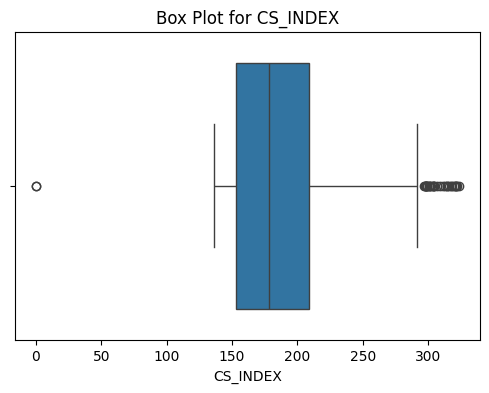

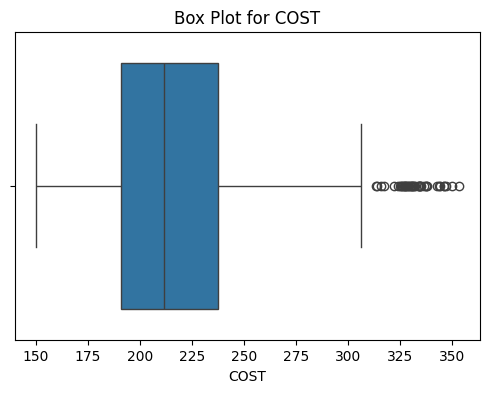

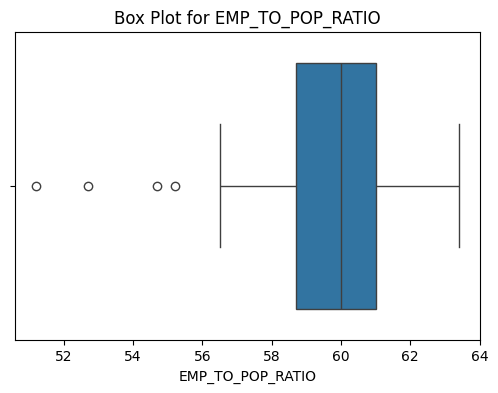

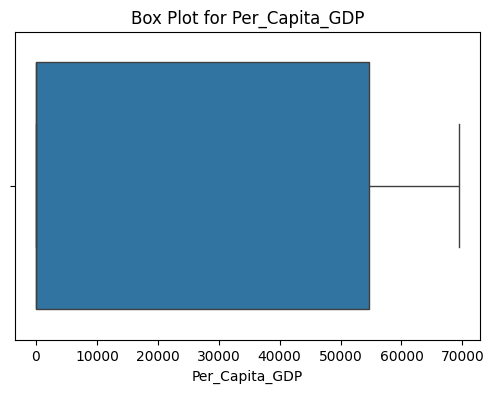

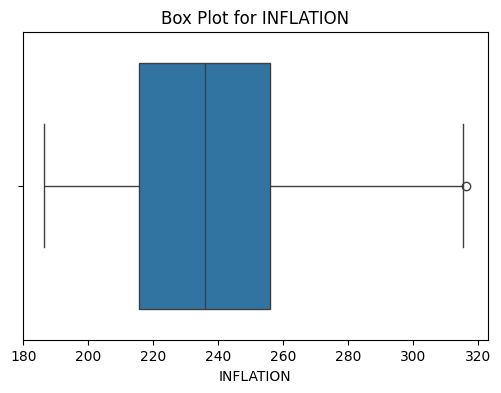

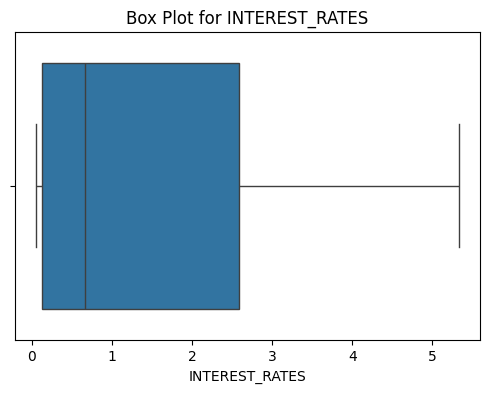

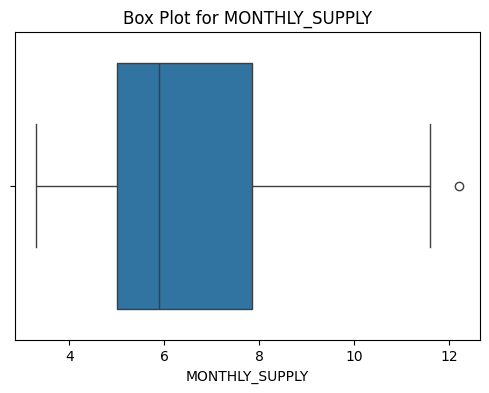

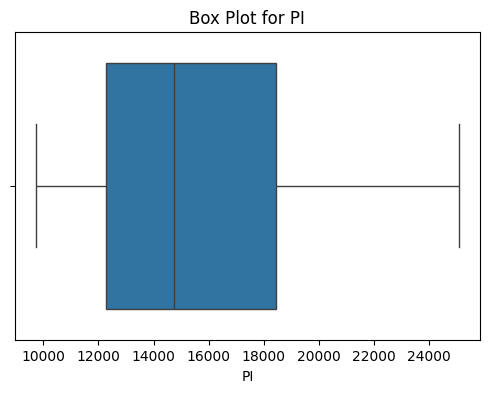

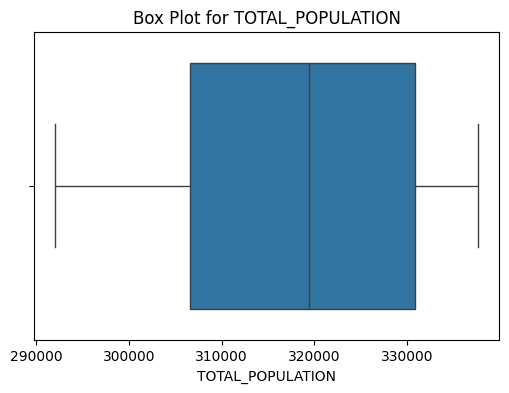

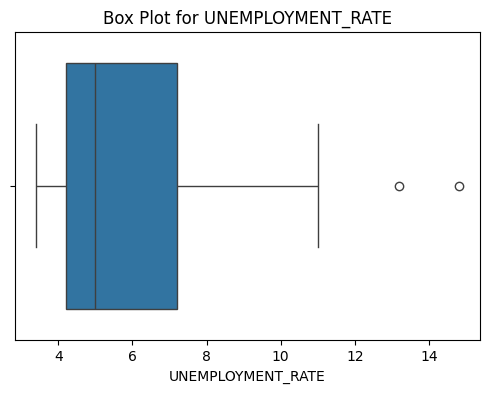

In [38]:
plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

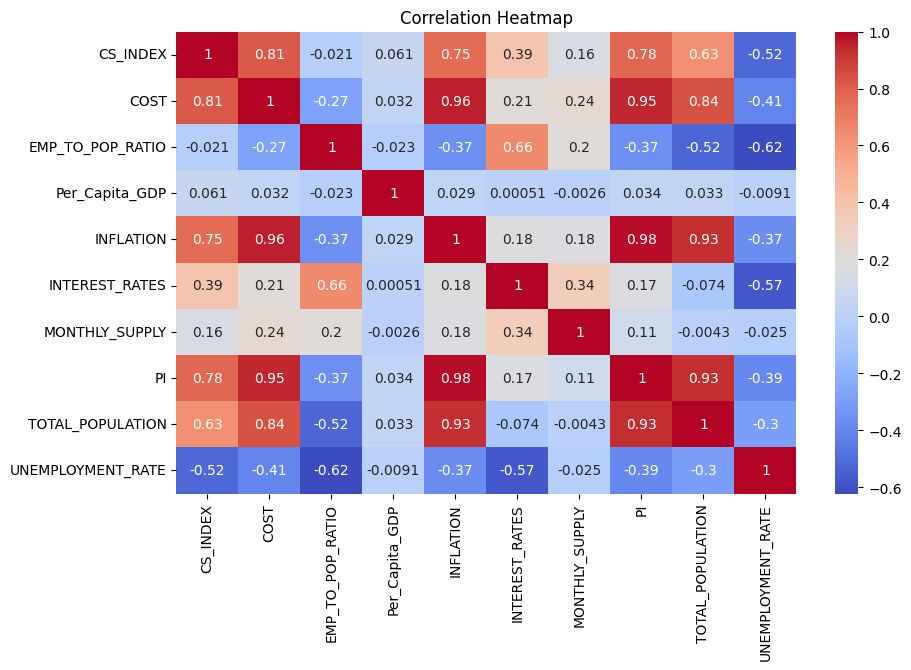

In [39]:
# Correlation heatmap for numerical features
numerical_cols = df_final.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_final[numerical_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

In [40]:
for col in numerical_cols:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_final[col] = df_final[col].clip(lower=lower_bound, upper=upper_bound)
    
df_final.head()

,CS_INDEX,COST,EMP_TO_POP_RATIO,Per_Capita_GDP,INFLATION,INTEREST_RATES,MONTHLY_SUPPLY,PI,TOTAL_POPULATION,UNEMPLOYMENT_RATE
DATE,,,,,,,,,,
2004-01-01,141.647,150.0,62.3,52179.0,186.3,1.00,3.8,9731.8,292046.0,5.7
2004-02-01,143.192,153.4,62.3,0.0,186.7,1.01,3.7,9765.4,292230.0,5.6
2004-03-01,145.059,156.5,62.2,0.0,187.1,1.00,3.6,9815.8,292434.0,5.8
2004-04-01,146.593,160.1,62.3,52469.0,187.4,1.00,4.0,9865.8,292651.0,5.6
2004-05-01,148.187,162.7,62.3,0.0,188.2,1.00,3.8,9950.0,292872.0,5.6


<Figure size 1200x600 with 0 Axes>

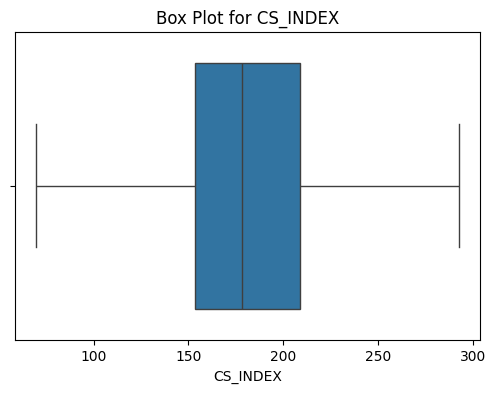

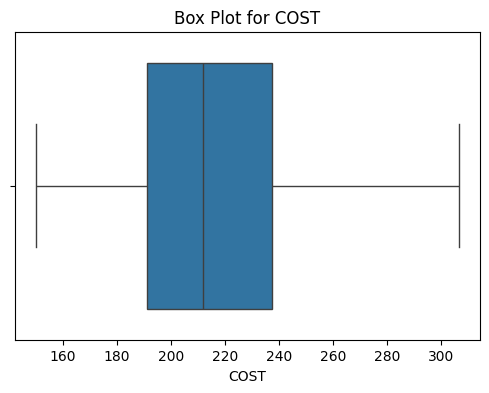

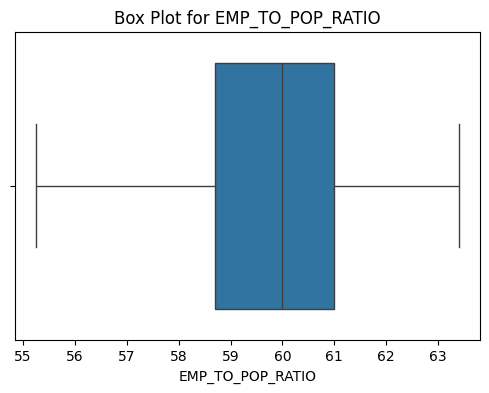

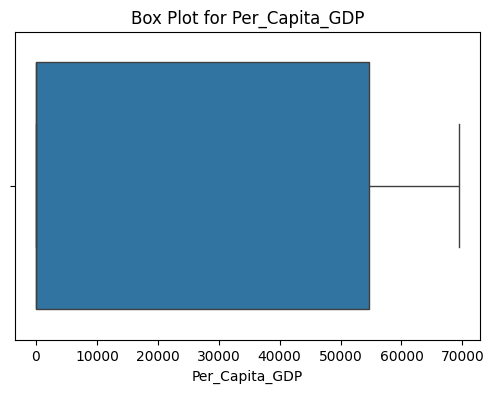

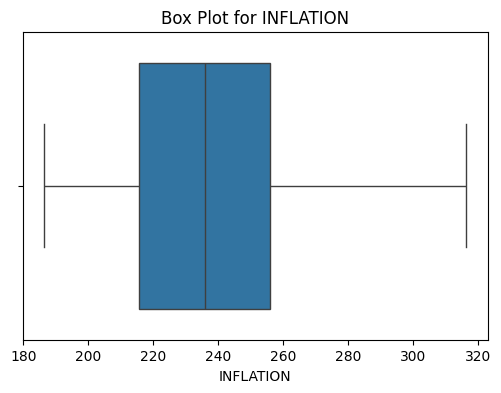

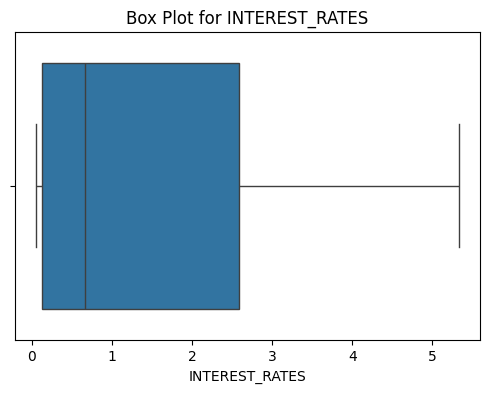

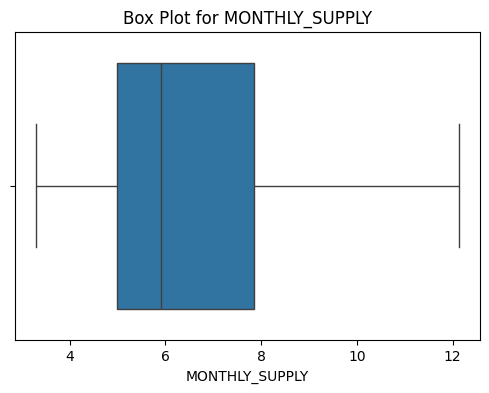

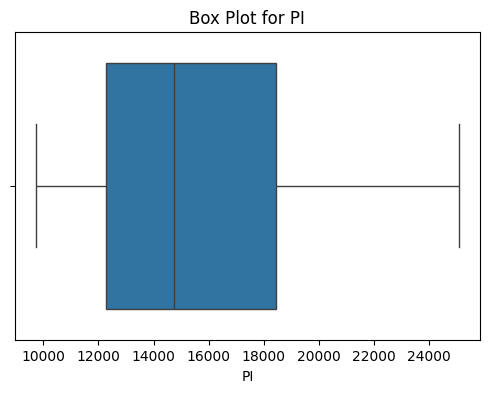

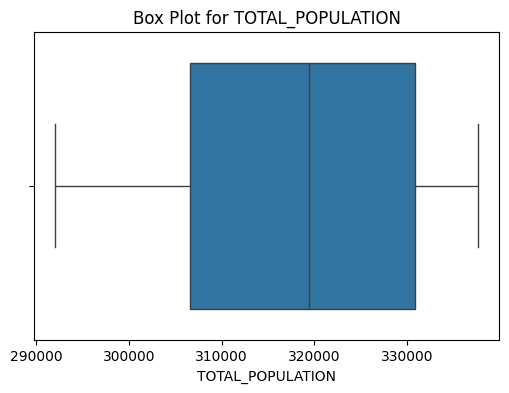

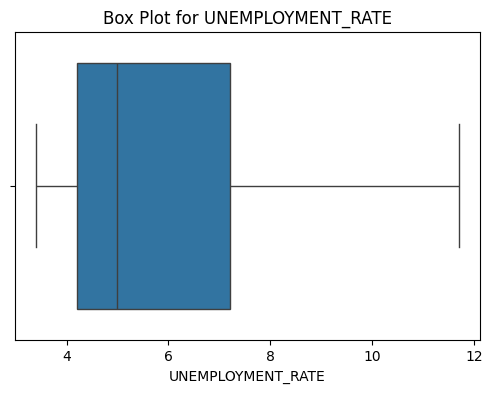

In [41]:
plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

In [42]:
df_final.head()

,CS_INDEX,COST,EMP_TO_POP_RATIO,Per_Capita_GDP,INFLATION,INTEREST_RATES,MONTHLY_SUPPLY,PI,TOTAL_POPULATION,UNEMPLOYMENT_RATE
DATE,,,,,,,,,,
2004-01-01,141.647,150.0,62.3,52179.0,186.3,1.00,3.8,9731.8,292046.0,5.7
2004-02-01,143.192,153.4,62.3,0.0,186.7,1.01,3.7,9765.4,292230.0,5.6
2004-03-01,145.059,156.5,62.2,0.0,187.1,1.00,3.6,9815.8,292434.0,5.8
2004-04-01,146.593,160.1,62.3,52469.0,187.4,1.00,4.0,9865.8,292651.0,5.6
2004-05-01,148.187,162.7,62.3,0.0,188.2,1.00,3.8,9950.0,292872.0,5.6


In [43]:
# Understanding the Correlations between the data after cleaning
corr_matrix= df_final.corr()
corr_matrix['CS_INDEX'].sort_values(ascending=False)

CS_INDEX             1.000000
COST                 0.838359
PI                   0.816753
INFLATION            0.787653
TOTAL_POPULATION     0.667875
INTEREST_RATES       0.393605
MONTHLY_SUPPLY       0.159749
Per_Capita_GDP       0.056977
EMP_TO_POP_RATIO    -0.019674
UNEMPLOYMENT_RATE   -0.570182
Name: CS_INDEX, dtype: float64

In [44]:
df_final.to_csv("final_data.csv")